# Regressão linear

Em termos mais gerais, um modelo linear faz uma predição simplesmente calculando uma soma ponderada das características de entrada, além de uma constante chamada *viés* (também chamado *intercepto* ou *coeficiente linear*).

## Exemplo de regressão linear

Primeiramente criaremos um conjunto de dados, e a parti desses dados iremos produzir uma regressão linear.

In [118]:
import matplotlib.pyplot as plt
# importando as bibliotecas para trabalhar com matrizes e conjuntos de dados
import numpy as np
import pandas as pd
!pip install matplotlib
%matplotlib inline
from matplotlib.pyplot import plot

In [339]:
# criando um conjunto de dados lineares
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
df = pd.DataFrame(X, columns=['X'])
df['y'] = y
df.head()

,X,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7


Text(0, 0.5, 'Valor')

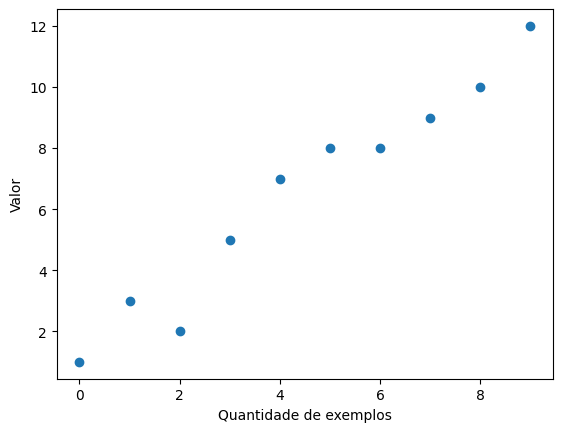

In [340]:
fig, ax = plt.subplots()
ax.scatter(df.X, df.y)
ax.set_xlabel("Quantidade de exemplos")
ax.set_ylabel("Valor")

## Mão na massa

Primeiramente iremos criar um modelo usando a biblioteca sklearn.

In [332]:
from sklearn.linear_model import LinearRegression

In [341]:
# criando o modelo de regressão linear
X = np.reshape(df.index, (-1, 1)) # remodelar os dados de entrada para 1x1
y = np.array(df.y)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [342]:
# coeficientes encontrado
model.coef_

array([1.16969697])

In [343]:
# R²
model.score(X, y)

0.952538038613988

In [344]:
y_predict = model.predict(X)

Text(0, 0.5, 'Valor')

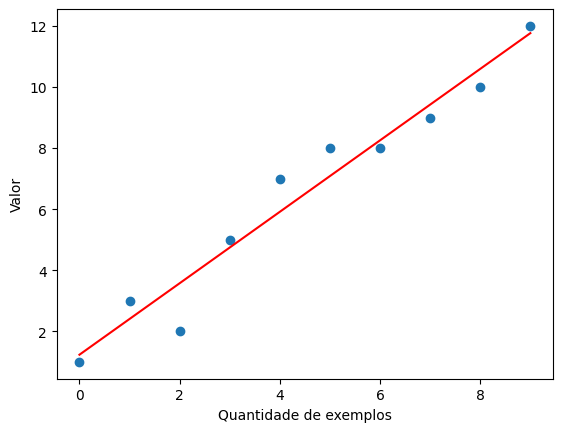

In [345]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_predict, color="#F00")
ax.set_xlabel("Quantidade de exemplos")
ax.set_ylabel("Valor")

Iremos criar uma modelo de regressão linear usando a seguinte fórmula:
y' = b + w1 . x2

Onde:
- *y'* é o rótulo previsto (uma saída esperada).
- *b* é o viés (a interseção em y), às vezes chamado **w0**.
- *w1* é o preso do atributo 1. Peso é o mesmo conceito de "inclinação" **m** na equação tradicional de uma linha.
- *x1* é um recurso (uma entrada esperada).

y' = b + w1 . x1 + w2 . x2 ... wn . xn

A classe abaixo foi desenvolvida com base nesse artigo: [Regressão Linear Simples - USP](https://edisciplinas.usp.br/pluginfile.php/1479289/mod_resource/content/0/regr_lin.pdf)

In [352]:
class MyLinearRegression:
    def __init__(self):
        self.formule = None
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x: np.array, y: np.array):
        n = x.size
        x_mean, y_mean = x.mean(), y.mean()

        b1 = (np.sum(y * x) - n * y_mean * x_mean) / (np.sum(x * x) - n * x_mean * x_mean)
        b0 = y_mean - b1 * x_mean

        self.coef_ = b1
        self.intercept_ = b0

        self.formule = lambda _x: b0 + b1 * _x

    def predict(self, x: np.array):
        return np.array(list(map(self.formule, x)))

In [353]:
linear_regression = MyLinearRegression()
linear_regression.fit(df.X, df.y)

In [354]:
linear_regression.coef_

1.1696969696969697

In [355]:
y_predict = linear_regression.predict(X)

In [356]:
y_predict

array([[ 1.23636364],
       [ 2.40606061],
       [ 3.57575758],
       [ 4.74545455],
       [ 5.91515152],
       [ 7.08484848],
       [ 8.25454545],
       [ 9.42424242],
       [10.59393939],
       [11.76363636]])

Text(0, 0.5, 'Valor')

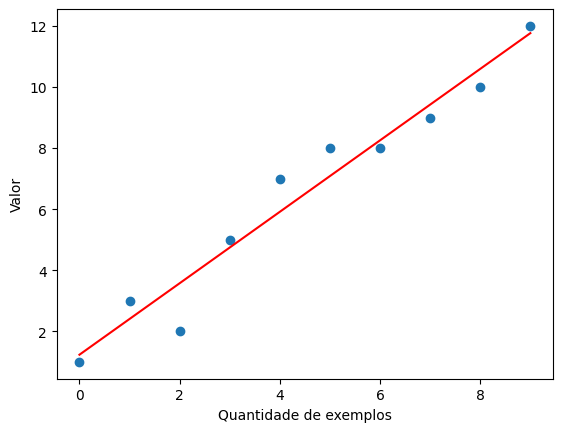

In [357]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_predict, color="#F00")
ax.set_xlabel("Quantidade de exemplos")
ax.set_ylabel("Valor")